<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-файла" data-toc-modified-id="Загрузка-и-изучение-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и изучение файла</a></span></li><li><span><a href="#Разделение-данных-на-выборки" data-toc-modified-id="Разделение-данных-на-выборки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разделение данных на выборки</a></span></li><li><span><a href="#Исследование-моделей" data-toc-modified-id="Исследование-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование моделей</a></span><ul class="toc-item"><li><span><a href="#Модель-&quot;дерево-решений&quot;" data-toc-modified-id="Модель-&quot;дерево-решений&quot;-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель "дерево решений"</a></span></li><li><span><a href="#Модель-&quot;случайный-лес&quot;" data-toc-modified-id="Модель-&quot;случайный-лес&quot;-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель "случайный лес"</a></span></li><li><span><a href="#Модель-&quot;логистическая-регрессия&quot;" data-toc-modified-id="Модель-&quot;логистическая-регрессия&quot;-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель "логистическая регрессия"</a></span></li></ul></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li><li><span><a href="#(бонус)-Проверка-модели-на-адекватность" data-toc-modified-id="(бонус)-Проверка-модели-на-адекватность-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>(бонус) Проверка модели на адекватность</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Рекомендация тарифов

Нужно построить модель для задачи классификации, которая выберет подходящий тариф.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

**Описание данных:**
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц.

`Известно:`
- сalls — количество звонков,
- minutes — суммарная длительность звонков в минутах,
- messages — количество sms-сообщений,
- mb_used — израсходованный интернет-трафик в Мб,
- is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

## Загрузка и изучение файла

In [91]:
# импорт требуемых библиотек

import pandas as pd #программная библиотека для обработки и анализа данных. Работа pandas с данными строится поверх библиотеки NumPy

import numpy as np #поддержка многомерных массивов; поддержка высокоуровневых математических функций, предназначенных для работы с многомерными массивами

# импорт требуемых библиотек для работы с машинным обучением "с учителем" для классификации (категориальные переменные)

from sklearn.tree import DecisionTreeClassifier #алгоритм классификации "деревом решений"

from sklearn.ensemble import RandomForestClassifier #алгоритм классификации "случайным лесом"

from sklearn.linear_model import LogisticRegression #алгоритм — логистическая регрессия

from sklearn.model_selection import train_test_split #функция train_test_split (от англ. «разделить на обучающую и тестовую») из модуля .model_selection

from sklearn.metrics import accuracy_score #импорт одной из метрик качества модели


from sklearn.dummy import DummyClassifier  #DummyClassifier делает прогнозы, которые игнорируют входные функции для оценки вменяемости

#__________________________#

import matplotlib.pyplot as plt #библиотека для визуализации данных двумерной графикой


In [92]:
df = pd.read_csv('/datasets/users_behavior.csv')  #серверный путь

In [93]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [95]:
print('Количество явных дубликатов под удаление:', df.duplicated().sum()) # подсчёт явных дубликатов

Количество явных дубликатов под удаление: 0


Описание данных:

- 3214 строк, 5 столбцов;
- нет отсутствующих значений;
- не требуется изменение имен столбцов;
- не требуется изменение типа данных;
- дубликатов нет.

In [96]:
#оценим данные в столбцах на отрицальные, аномально высокие значения или другие отклонения

columns_list = ['calls', 'minutes', 'messages', 'mb_used']

for column in columns_list:
    print(column.upper())
    display(round(df[column].describe(),1))
    print()

CALLS


count    3214.0
mean       63.0
std        33.2
min         0.0
25%        40.0
50%        62.0
75%        82.0
max       244.0
Name: calls, dtype: float64


MINUTES


count    3214.0
mean      438.2
std       234.6
min         0.0
25%       274.6
50%       430.6
75%       571.9
max      1632.1
Name: minutes, dtype: float64


MESSAGES


count    3214.0
mean       38.3
std        36.1
min         0.0
25%         9.0
50%        30.0
75%        57.0
max       224.0
Name: messages, dtype: float64


MB_USED


count     3214.0
mean     17207.7
std       7571.0
min          0.0
25%      12491.9
50%      16943.2
75%      21424.7
max      49745.7
Name: mb_used, dtype: float64

Выбросов по данным (сверхвысокие или отрицательные значения) для столбцов 'calls', 'minutes', 'messages', 'mb_used' не отмечено.

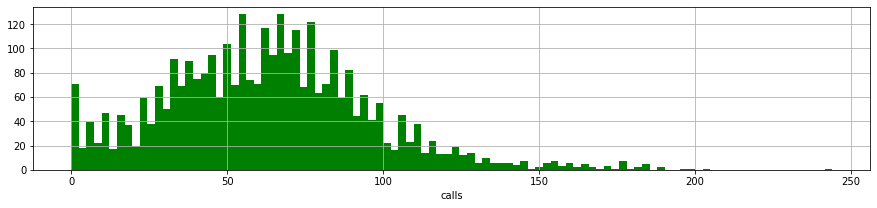

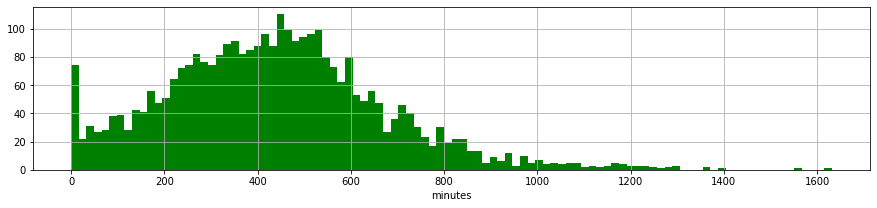

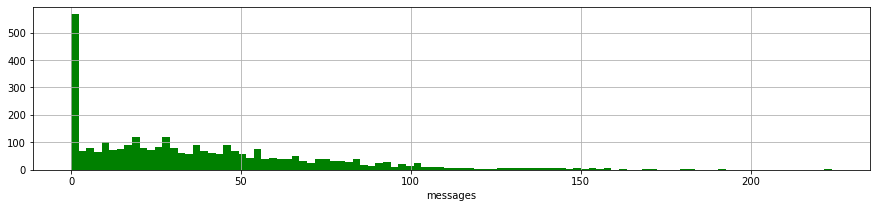

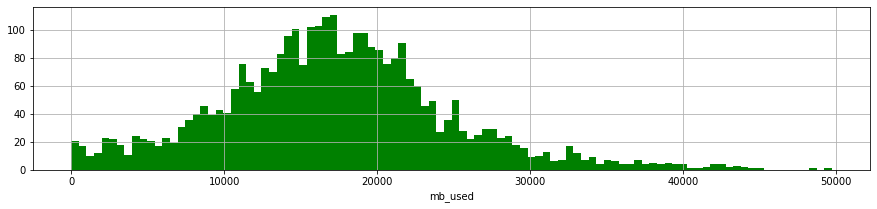

In [97]:
#оценим данные в столбцах по гистограммам

columns_list = ['calls', 'minutes', 'messages', 'mb_used']

for column in columns_list:
    df[column].hist(
        bins=100,
        grid=True,
        figsize=(15,3),
        color='green'
    ).set_xlabel(column)
    plt.show()

Критичных отклонений нет. Можно отметить, что достаточно много 0 значений.

**Вывод:**
    
1. Данные пригодны для машинного обучения и не требуют предобработки.
2. Тарифы - категориальные переменные:
    - `1 - ultra`,
    - `0 - smart`.

## Разделение данных на выборки

Требуется разделить весть датафрейм на 3 выборки:

    1. Обучающая (60% доля )
    2. Валидационная (20% доля)
    3. Тестовая (20% доля)

- Разделим дата фрейм сначала на две части (60% и 40%), а затем вторую часть разделим пополам (20% и 20%).
- Тестовую выборку использовать не будем, "спрячем".

In [98]:
df_main, df_40 = train_test_split(df, test_size=0.40, random_state=321)

In [99]:
df_valid, df_test = train_test_split(df_40, test_size=0.50, random_state=321)

In [100]:
#проверим размерности датафреймов

print('Размер обучающего датафрейма:', df_main.shape)
print('Размер валидационного датафрейма:', df_valid.shape)
print('Размер тестового датафрейма:', df_test.shape)

Размер обучающего датафрейма: (1928, 5)
Размер валидационного датафрейма: (643, 5)
Размер тестового датафрейма: (643, 5)


Разделим датафреймы на "признаки" (features) и "целевой признак" (target)

In [101]:
features_train = df_main.drop(['is_ultra'], axis=1) #обучающий датафрейм по "признакам"

target_train = df_main['is_ultra'] #обучающий датафрейм по "целевому признаку"

features_valid = df_valid.drop(['is_ultra'], axis=1) #валидационный датафрейм по "признакам"

target_valid = df_valid['is_ultra'] #валидационный датафрейм по "целевому признаку"

features_test = df_test.drop(['is_ultra'], axis=1) #тестовый датафрейм по "признакам"

target_test = df_test['is_ultra'] #тестовый датафрейм по "целевому признаку"

## Исследование моделей

### Модель "дерево решений" ###

In [102]:
#создадим цикл с перебором гипперпараметров:
# - глубина дерева
# - min_samples_split -  гиперпараметр запрещает создавать узлы, в которые попадает слишком мало объектов обучающей выборки
# - min_samples_leaf - гиперпараметр не разрешает создавать лист, в котором слишком мало объектов обучающей выборки.
#и поиска модели обеспечивающей лучшее значение метрики качества модели - accuracy

best_model_tree = None
best_result_tree = 0
best_depth_tree = 0

for depth_tree in range(1, 11):                                           # глубина дерева от 1 до 10
    for samples_split in range(2, 25):                                     # min_samples_split must be an integer greater than 1
        for samples_leaf in range(1, 5):
            
            model_tree = DecisionTreeClassifier(
                random_state=321,
                max_depth=depth_tree,
                min_samples_leaf=samples_leaf,
                min_samples_split=samples_split
            )                                                             # модель с заданным количеством деревьев
    
            model_tree.fit(features_train,target_train)                   # обучение модели на тренировочной выборке
    
            predictions_valid = model_tree.predict(features_valid)        # предсказание модели
    
            result_tree = accuracy_score(predictions_valid,target_valid)  # качество модели на валидационной выборке
    
            if result_tree > best_result_tree:
                best_model_tree = model_tree                              # сохранение наилучшей модели
                best_result_tree = result_tree                            # сохранение наилучшего значения метрики accuracy
                best_depth_tree = depth_tree                                   # сохранение наилучщей глубины деревьев
        
print(f'Лучшая модель "дерево решений"')
print(best_model_tree)
print()
print(f'Accuracy_score "дерево решений": {round(best_result_tree,5)}')
print(f'Глубина дерева: {best_depth_tree}')

Лучшая модель "дерево решений"
DecisionTreeClassifier(max_depth=6, min_samples_split=14, random_state=321)

Accuracy_score "дерево решений": 0.79005
Глубина дерева: 6


**Вывод:** Лучшая модель обеспечивает аккуратность модели в 0.7900, что выше целевого значения в 0.75.

### Модель "случайный лес" ###

In [103]:
#создадим цикл с перебором гипперпараметров:
# - количество деревьев в лесу, шагом и глубиной деревьев
#для поиска модели обеспечивающей лучшее значение метрики качества модели - accuracy

best_model_forest = None
best_result_forest = 0
best_estimator = 0
best_depth_forest = 0

for estimator in range(10, 51, 1):                                   #с количеством деревьев: от 10 до 50 с шагом 1
    for depth_forest in range(1, 20):                                # глубина дерева от 1 до 19
        model_forest = RandomForestClassifier(
            random_state=321,
            n_estimators=estimator,
            max_depth=depth_forest
        )                                                             # модель с заданным количеством деревьев
        
        model_forest.fit(features_train,target_train)                 # обучение модели на тренировочной выборке
    
        predictions_valid_fr = model_forest.predict(features_valid)   # предсказание модели
        
        result_forest = accuracy_score(predictions_valid_fr,target_valid)  # качество модели на валидационной выборке
        
        if result_forest > best_result_forest:
            best_model_forest = model_forest                          # сохранение наилучшей модели
            best_result_forest = result_forest                        # сохранение наилучшего значения метрики accuracy
            best_estimator = estimator                                # сохранение наилучщего количества деревьев в "случайном лесу"
            best_depth_forest = depth_forest                          # сохранение наилучщей глубины деревьев
        
        
print(f'Лучшая модель "случайный лес"')
print(best_model_forest)
print()
print(f'Accuracy_score "случайный лес": {round(best_result_forest,4)}')
print(f'Количество деревьев: {best_estimator}')
print(f'Глубина дерева: {best_depth_forest}')

Лучшая модель "случайный лес"
RandomForestClassifier(max_depth=14, n_estimators=22, random_state=321)

Accuracy_score "случайный лес": 0.8087
Количество деревьев: 22
Глубина дерева: 14


**Вывод:** Лучшая модель обеспечивает аккуратность модели в 0.8087, что выше целевого значения в 0.75.

### Модель "логистическая регрессия" ###

In [104]:
#создадим цикл с перебором гипперпараметров:
# - количество итераций
#для поиска модели обеспечивающей лучшее значение метрики качества модели - accuracy через функцию .score()

best_model_log_reg = None
best_result_log_reg = 0
best_iteration_log_reg = 0

for iteration in range(500, 2001, 50):                               #с количеством итераций от 500 до 2000 с шагом 50
    
    model_log_reg = LogisticRegression(
        random_state=321,                                             # гипперпараметр рандома
        solver='lbfgs',                                               # алгоритм, который будет строить модель
        max_iter=iteration                                            # максимальное количество итераций обучения
    )  # модель логистической регрессии 
    
    model_log_reg.fit(features_train,target_train)                    # обучение модели на тренировочной выборке
    
    result_log_reg = model_log_reg.score(features_valid,target_valid) # получите метрику качества модели через .score()
    
    if result_log_reg > best_result_log_reg:
        best_model_log_reg = model_log_reg                            # сохранение наилучшей модели
        best_result_log_reg = result_log_reg                          # сохранение наилучшего значения метрики accuracy
        best_iteration_log_reg = iteration                            # сохранение наилучшей итерации
        
print(f'Лучшая модель "логистическая регрессия": \
    {best_model_log_reg}')
print()
print(f'Accuracy_score "логистическая регрессия": {round(best_result_log_reg,4)}')
print(f'Количество итераций: {best_iteration_log_reg}')

Лучшая модель "логистическая регрессия":     LogisticRegression(max_iter=500, random_state=321)

Accuracy_score "логистическая регрессия": 0.7247
Количество итераций: 500


**Вывод:** Лучшая модель обеспечивает аккуратность модели в 0.7247, что НИЖЕ целевого значения в 0.75.

## Проверка модели на тестовой выборке

Для текущего проекта примем допущение, что модель "дерево решений" дает наилучший результат:

In [105]:
predictions_test = best_model_tree.predict(features_test)        # предсказание лучшей модели на тестовой выборке
    
result_tree_test = accuracy_score(predictions_test,target_test)  # качество модели на тестовой выборке

print(f'Accuracy_score "дерево решений" для тестовой выборки: {round(result_tree_test,4)}')

Accuracy_score "дерево решений" для тестовой выборки: 0.7776


**Вывод**:

Аккуратность модели на тестовой выборке снизилась, что ожидаемо для новых данных, в тоже время показатели выше целевого - 0.75.

## Проверка модели на адекватность

Проверим модель на базе DummyClassifier, который делает прогнозы, которые игнорируют входные функции.

In [106]:
#создадим модель, которая делает предсказания на основе часто встречаемой величины целевого параметра без учета входных

model_dummy = DummyClassifier(random_state=321, strategy="most_frequent") 

model_dummy.fit(predictions_test,target_test)
                            
predictions_model_dummy = model_dummy.predict(features_test)       # предсказание модели на базе DummyClassifier
        
result_model_dummy = accuracy_score(predictions_model_dummy,target_test)  # качество модели на валидационной выборке по accuracy_score

In [107]:
print(f'Accuracy_score для DummyClassifier по тестовой выборке: {round(result_model_dummy,4)}')

Accuracy_score для DummyClassifier по тестовой выборке: 0.703


**Вывод**:

Простая модель на тестовой выборке, которая делает предсказания на основе часто встречаемой величины целевого параметра без учета входных, дает "точность" прогноза   - 0.703. Выбранная модель "дерево решений" дает наилучший результат - 0.7776 на той же тестовой выборке, что говорит об адекватности выбранной модели.

## Вывод:

По результатам выполнения проекта были реализованы следующие этапы:
    
1. Описание данных:
    - 3214 строк, 5 столбцов;
    - нет отсутствующих значений;
    - не требуется изменение имен столбцов;
    - не требуется изменение типа данных;
    - дубликатов нет.
    

Выбросов по данным (сверхвысокие или отрицательные значения) для столбцов 'calls', 'minutes', 'messages', 'mb_used' не отмечено. Данные пригодны для машинного обучения и не требуют предобработки.
Тарифы - категориальные переменные: `1 - ultra,` `0 - smart.`

2. Весть датафрейм был разделен на 3 выборки:
    - Обучающая (60% доля )
    - Валидационная (20% доля)
    - Тестовая (20% доля)
    

3. Для машинного обучения категориальных переменных было выбрано 3 подхода:
- Дерево решений:
    - обеспечивает аккуратность модели в 0.7900, что выше целевого значения в 0.75
- Случайный лес:
    - обеспечивает аккуратность модели в 0.8087, что выше целевого значения в 0.75
- Логистическая регрессия:
    - обеспечивает аккуратность модели в 0.7247, что НИЖЕ целевого значения в 0.75
    
4. Тестовый датафрейм был проверен по лучшей модели "дерево решений":
    - Аккуратность модели на тестовой выборке снизилась - 0.7776, что ожидаемо для новых данных, в тоже время показатели выше целевого - 0.75
    
5. Проведена проверка на адекватность на базе DummyClassifier, который делает прогнозы, которые игнорируют входные функции.
- Простая модель на тестовой выборке, которая делает предсказания на основе часто встречаемой величины целевого параметра без учета входных, дает "точность" прогноза - 0.703.
- Выбранная модель "дерево решений" дает наилучший результат - 0.7776 на той же тестовой выборке, что говорит об адекватности выбранной модели.

## Чек-лист готовности проекта

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 4: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
